<a href="https://colab.research.google.com/github/javisnes/Analisis-de-Abandono-de-Clientes/blob/main/An%C3%A1lisis_de_Abandono_de_Clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import random

# Generar datos base
np.random.seed(42)
n = 1200
data = {
    'ID_Cliente': [f'CLI-{1000+i}' for i in range(n)],
    'Edad': [random.randint(18, 85) if random.random() > 0.05 else np.nan for i in range(n)],
    'Tipo_Contrato': [random.choice(['Mensual', 'Anual', 'Mensuall', 'Anuall']) for i in range(n)],
    'Cargos_Mensuales': [random.uniform(20, 120) for i in range(n)],
    'Meses_Antiguedad': [random.randint(1, 72) if random.random() > 0.03 else -5 for i in range(n)],
    'Abandono': [random.choice(['Si', 'No']) for i in range(n)]
}

df_churn = pd.DataFrame(data)
# Agregar duplicados
df_churn = pd.concat([df_churn, df_churn.sample(n=30)]).reset_index(drop=True)

print("✅ Dataset 'Telecom_Churn_Dirty.csv' creado con 1230 filas.")

✅ Dataset 'Telecom_Churn_Dirty.csv' creado con 1230 filas.


In [4]:
# 1. Eliminar Duplicados
df_churn = df_churn.drop_duplicates()

# 2. Corregir errores de texto (Typos en Contrato)
correcciones = {'Mensuall': 'Mensual', 'Anuall': 'Anual'}
df_churn['Tipo_Contrato'] = df_churn['Tipo_Contrato'].replace(correcciones)

# 3. Tratar valores nulos (Edad)
# En lugar de borrar, usaremos la mediana de edad
df_churn['Edad'] = df_churn['Edad'].fillna(df_churn['Edad'].median())

# 4. Limpiar errores lógicos (Meses negativos)
df_churn = df_churn[df_churn['Meses_Antiguedad'] >= 0]

print("✨ Datos limpios. Filas restantes:", len(df_churn))

✨ Datos limpios. Filas restantes: 1171


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# 1. Preparar datos (Encoding)
le = LabelEncoder()
df_churn['Tipo_Contrato_Num'] = le.fit_transform(df_churn['Tipo_Contrato'])
df_churn['Abandono_Num'] = le.fit_transform(df_churn['Abandono']) # No=0, Si=1

# 2. Definir X e Y
X = df_churn[['Edad', 'Cargos_Mensuales', 'Meses_Antiguedad', 'Tipo_Contrato_Num']]
y = df_churn['Abandono_Num']

# 3. Dividir y Entrenar (Usaremos Random Forest, que es más potente para clasificar)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo_churn = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_churn.fit(X_train, y_train)

# 4. Evaluación
predicciones = modelo_churn.predict(X_test)
print("📊 Reporte de Clasificación:")
print(classification_report(y_test, predicciones))

📊 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.50      0.42      0.46       126
           1       0.43      0.51      0.47       109

    accuracy                           0.46       235
   macro avg       0.47      0.47      0.46       235
weighted avg       0.47      0.46      0.46       235



/tmp/ipython-input-302894147.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importancias, y=importancias.index, palette='magma')


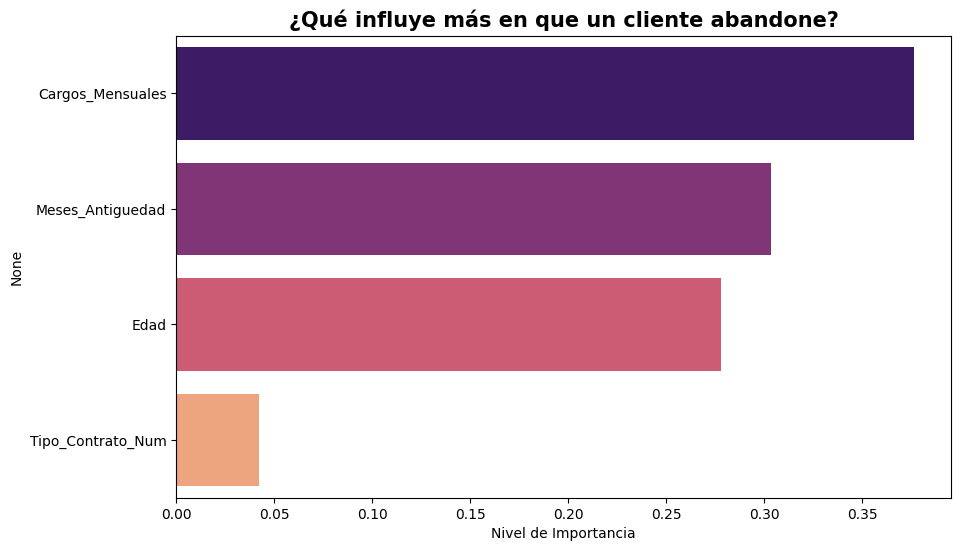

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ver importancia de las variables
importancias = pd.Series(modelo_churn.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importancias, y=importancias.index, palette='magma')
plt.title('¿Qué influye más en que un cliente abandone?', fontsize=15, fontweight='bold')
plt.xlabel('Nivel de Importancia')
plt.show()

In [7]:
# Guarda el DataFrame limpio en un archivo CSV
df_churn.to_csv('dataset_churn_limpio.csv', index=False)

print("✅ Archivo 'dataset_churn_limpio.csv' generado exitosamente.")

✅ Archivo 'dataset_churn_limpio.csv' generado exitosamente.
